# Download ETF data

In [38]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
tickers = ['SPY','TLT']
etf = yf.Tickers(tickers)
data = etf.history(start = '2002-09-01', actions=False)
data

[*********************100%***********************]  2 of 2 completed


Price                           Close                   High             \
Ticker                            SPY        TLT         SPY        TLT   
Date                                                                      
2002-09-03 00:00:00+00:00   58.323544  42.238644   60.120554  42.238644   
2002-09-04 00:00:00+00:00   59.155994  42.229073   59.625066  42.363410   
2002-09-05 00:00:00+00:00   58.653889  42.459354   59.083322  42.531320   
2002-09-06 00:00:00+00:00   59.459877  41.960377   59.836456  42.310608   
2002-09-09 00:00:00+00:00   59.895954  41.898029   60.351810  42.137913   
...                               ...        ...         ...        ...   
2024-08-26 00:00:00+00:00  560.789978  98.139999  563.909973  98.699997   
2024-08-27 00:00:00+00:00  561.559998  97.970001  562.059998  98.080002   
2024-08-28 00:00:00+00:00  558.299988  97.849998  561.650024  98.199997   
2024-08-29 00:00:00+00:00  558.349976  97.529999  563.679993  97.639999   
2024-08-30 00:00:00+00:00  563.679993  96.489998  564.200012  97.989998   

Price                             Low                   Open             \
Ticker                            SPY        TLT         SPY        TLT   
Date                                                                      
2002-09-03 00:00:00+00:00   58.237659  41.739686   59.942177  41.778068   
2002-09-04 00:00:00+00:00   58.178207  42.142714   58.541575  42.233871   
2002-09-05 00:00:00+00:00   57.808238  41.922014   58.462295  42.492938   
2002-09-06 00:00:00+00:00   59.023835  41.835636   59.294711  42.205059   
2002-09-09 00:00:00+00:00   58.667116  41.864446   58.865312  41.979589   
...                               ...        ...         ...        ...   
2024-08-26 00:00:00+00:00  559.049988  98.080002  563.179993  98.690002   
2024-08-27 00:00:00+00:00  558.320007  97.410004  559.489990  97.489998   
2024-08-28 00:00:00+00:00  555.039978  97.730003  561.210022  98.010002   
2024-08-29 00:00:00+00:00  557.179993  97.129997  560.309998  97.370003   
2024-08-30 00:00:00+00:00  557.140015  96.470001  560.770020  97.680000   

Price                        Volume            
Ticker                          SPY       TLT  
Date                                           
2002-09-03 00:00:00+00:00  76586400    102100  
2002-09-04 00:00:00+00:00  51099500     66300  
2002-09-05 00:00:00+00:00  67250900    648400  
2002-09-06 00:00:00+00:00  38622200    140000  
2002-09-09 00:00:00+00:00  33998400     83800  
...                             ...       ...  
2024-08-26 00:00:00+00:00  35788600  23198700  
2024-08-27 00:00:00+00:00  32693900  21507700  
2024-08-28 00:00:00+00:00  41066000  18501400  
2024-08-29 00:00:00+00:00  38715200  24988200  
2024-08-30 00:00:00+00:00  62667800  42848400  

[5537 rows x 10 columns]

In [40]:
data.drop(['Open','Low','High','Volume'], inplace =True, axis=1)
data

Price                           Close           
Ticker                            SPY        TLT
Date                                            
2002-09-03 00:00:00+00:00   58.323544  42.238644
2002-09-04 00:00:00+00:00   59.155994  42.229073
2002-09-05 00:00:00+00:00   58.653889  42.459354
2002-09-06 00:00:00+00:00   59.459877  41.960377
2002-09-09 00:00:00+00:00   59.895954  41.898029
...                               ...        ...
2024-08-26 00:00:00+00:00  560.789978  98.139999
2024-08-27 00:00:00+00:00  561.559998  97.970001
2024-08-28 00:00:00+00:00  558.299988  97.849998
2024-08-29 00:00:00+00:00  558.349976  97.529999
2024-08-30 00:00:00+00:00  563.679993  96.489998

[5537 rows x 2 columns]

In [41]:
# Reset the index to bring 'Date' back as a column
data = data.reset_index()

# Convert the 'Date' column to 'yyyy-mm-dd' format
data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%Y-%m-%d')

# Set the 'Date' column back as the index if desired
data.set_index('Date', inplace=True)

In [42]:
data

Price            Close           
Ticker             SPY        TLT
Date                             
2002-09-03   58.323544  42.238644
2002-09-04   59.155994  42.229073
2002-09-05   58.653889  42.459354
2002-09-06   59.459877  41.960377
2002-09-09   59.895954  41.898029
...                ...        ...
2024-08-26  560.789978  98.139999
2024-08-27  561.559998  97.970001
2024-08-28  558.299988  97.849998
2024-08-29  558.349976  97.529999
2024-08-30  563.679993  96.489998

[5537 rows x 2 columns]

<Axes: xlabel='Date'>

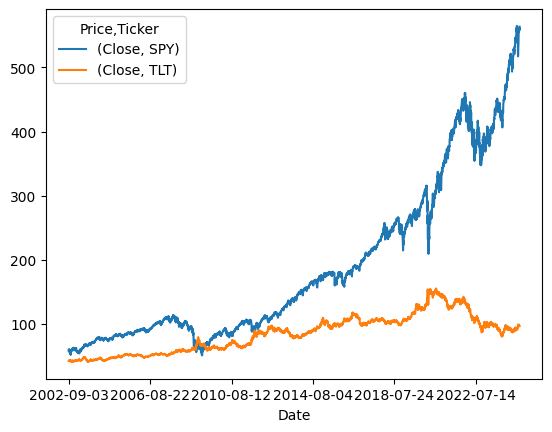

In [43]:
data.plot()

# Input Variables :
- 1. Return
- 2. Volatility
- 3. Correlation 

## 1. Return

In [44]:
rets = data.pct_change().fillna(0)
rets.head()

Price          Close          
Ticker           SPY       TLT
Date                          
2002-09-03  0.000000  0.000000
2002-09-04  0.014273 -0.000227
2002-09-05 -0.008488  0.005453
2002-09-06  0.013741 -0.011752
2002-09-09  0.007334 -0.001486

Text(0, 0.5, 'Return')

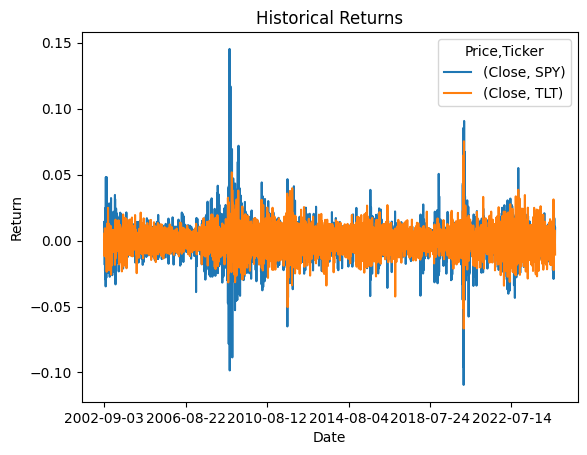

In [45]:
rets.plot()
plt.title('Historical Returns')
plt.xlabel('Date')
plt.ylabel('Return')

## 2. Volatility

In [46]:
# vol for total period
total_vol = rets.std() * np.sqrt(252)
total_vol

Price  Ticker
Close  SPY       0.188824
       TLT       0.144907
dtype: float64

In [47]:
# Annual volatility
vols = rets.rolling(252).std() * np.sqrt(252)
vols

Price          Close          
Ticker           SPY       TLT
Date                          
2002-09-03       NaN       NaN
2002-09-04       NaN       NaN
2002-09-05       NaN       NaN
2002-09-06       NaN       NaN
2002-09-09       NaN       NaN
...              ...       ...
2024-08-26  0.123771  0.167034
2024-08-27  0.123626  0.167021
2024-08-28  0.123701  0.167027
2024-08-29  0.122965  0.166758
2024-08-30  0.123225  0.167111

[5537 rows x 2 columns]

Text(0, 0.5, 'Vols')

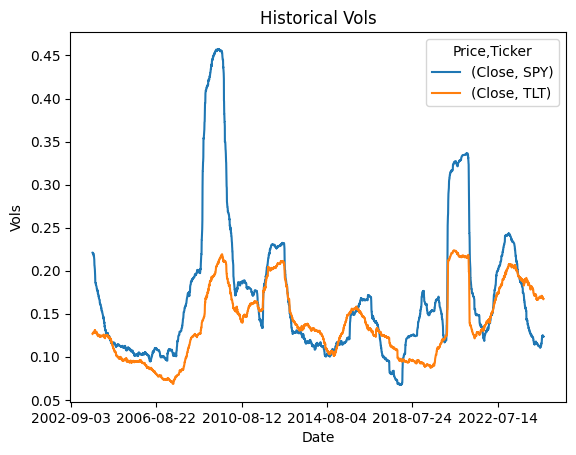

In [48]:
vols.plot()
plt.title('Historical Vols')
plt.xlabel('Date')
plt.ylabel('Vols')

# 3. Correlation

In [51]:
# Access the data using the MultiIndex
spy_rets = rets['Close', 'SPY']
tlt_rets = rets['Close', 'TLT']

# Calculate the correlation between SPY and TLT
total_corr = spy_rets.corr(tlt_rets)
print(total_corr)

-0.32780408799826083


In [52]:
# Annual Corr
corr = spy_rets.rolling(252).corr(tlt_rets)
corr


Date
2002-09-03         NaN
2002-09-04         NaN
2002-09-05         NaN
2002-09-06         NaN
2002-09-09         NaN
                ...   
2024-08-26    0.211467
2024-08-27    0.210847
2024-08-28    0.211035
2024-08-29    0.206131
2024-08-30    0.200895
Length: 5537, dtype: float64

Text(0, 0.5, 'Correlation')

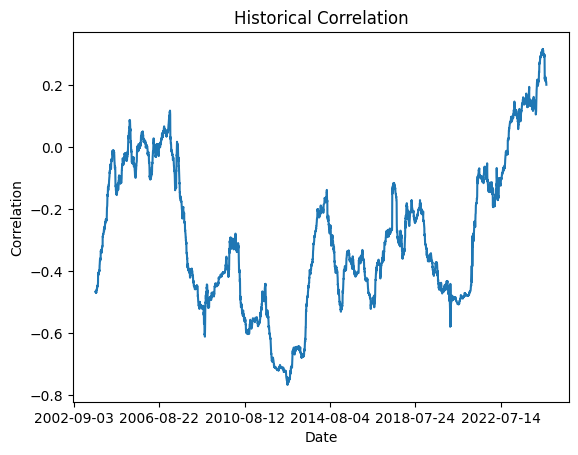

In [53]:
corr.plot()
plt.title('Historical Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')